In [0]:
# HW6
Using File 7 as we are Group 7

In [0]:
import string
import sys
import io
import ijson
import pandas as pd
import numpy as np
import datetime
import copy 
import re
import scipy
from scipy.spatial import distance
import nltk
import sklearn
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegressionCV

In [0]:
#nltk.download()  

In [0]:
###### Using File 7 as we are Group 7 #######

cols = ["reviewerID", "asin", "reviewerName", "helpful_start",
        "helpful_end", "reviewText", "overall", "summary",
        "unixReviewTime", "reviewTime"]

reviewerID = []
asin = []
reviewerName = []
helpful_start = []
helpful_end = []
reviewText = []
overall = []
summary = []
unixReviewTime = []
reviewTime = []
helpful = []

a = datetime.datetime.now()

with open('reviews_electronics.7.json', encoding="UTF-8") as json_file:
    cursor = 0
    for line_number, line in enumerate(json_file):
        #print ("Processing line", line_number + 1,"at cursor index:", cursor)
        line_as_file = io.StringIO(line)
        # Use a new parser for each line
        json_parser = ijson.parse(line_as_file)
        for prefix, type, value in json_parser:
            if (type == 'string') | (type == 'number'):
                if prefix.strip() == 'reviewerID':
                    reviewerID.append(value)
                    #print(value)
                elif prefix.strip() == 'asin':
                    asin.append(value)
                elif prefix.strip() == 'reviewerName':
                    reviewerName.append(value)
                elif prefix.strip() == 'helpful.item':
                    helpful.append(value)
                elif prefix.strip() == 'reviewText':
                    reviewText.append(value)
                elif prefix.strip() == 'overall':
                    overall.append(value)
                elif prefix.strip() == 'summary':
                    summary.append(value)
                elif prefix.strip() == 'unixReviewTime':
                    unixReviewTime.append(value)
                elif prefix.strip() == 'reviewTime':
                    reviewTime.append(value)
        cursor += len(line)

        
b = datetime.datetime.now()
       
helpful_start = [helpful[i] for i in range(len(helpful)) if i%2 == 0]
helpful_end = [helpful[i] for i in range(len(helpful)) if i%2 == 1]

review = pd.DataFrame(list(zip(reviewerID, asin, reviewerName, helpful_start, helpful_end,
                           reviewText, overall, summary, unixReviewTime, reviewTime)),
               columns =cols)
c=b-a
print(c.seconds)

41


In [0]:
review.shape

(492845, 10)

In [0]:
review.head()

,reviewerID,asin,reviewerName,helpful_start,helpful_end,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""",1,1,Corey Barker does a great job of explaining Bl...,5.0,Very thorough,1365811200,"04 13, 2013"
1,A1C9DX5I4N7CSP,B0031GGQC6,Bernie D,0,0,"Compatible, trouble-free memory at an excellen...",5.0,Komputerbay Memory,1347840000,"09 17, 2012"
2,A3W0E107PP7K1D,B0031GGQC6,best*seller,0,0,Memory fits Powerspec PC just fine. The memory...,5.0,Fits my desktop PC great,1385942400,"12 2, 2013"
3,A1ZF9CKPP5DF3H,B0031GGQC6,B,0,0,I received exactly what I ordered and more qui...,5.0,Very Satisfied,1391644800,"02 6, 2014"
4,A3HI0M5M6THIBD,B0031GGQC6,Bigmac,0,0,Came in okay no problems. Sorry late on review...,5.0,2g ram,1358380800,"01 17, 2013"


In [0]:
#review.groupby(['overall']).mean()

### 1. Get rid of punctuation and Treat each review as a document. Ignore misspellings. Convert all reviews to lower case. Handle negation: Look for the following two negations: "not" and "xxxn't" (e.g., don't, didn't etc.). Split off the "n't" part from "xxxn't" into separate words "xxx" and "not". Attach all 'not's (any normal "not" appearing in the text as well as the "n't" converted to "not") to the subsequent word, eg "not_nextword" (code this yourself).

In [0]:
#nltk.download() 

In [0]:
review_dict=dict()
n=len(review)
#n=10000
for i in range(n):
    try:
        #tokenize
        temptext=review.loc[i]['reviewText'] #each review's text 
        temptext=temptext.lower() #lowercase 
        word_tokens= word_tokenize(str(temptext))
        review_dict[i]=word_tokens
        indices = [x for x, y in enumerate(word_tokens) if y == "n't" or y == 'not'] #find out the negations indexes
        if not indices:
            continue
        else:
            for a in indices: 
                deduct=indices.index(a) 
                a=a-deduct #every word deducted, the rest 'a' needs to be adjusted
                try:
                    nextword= review_dict[i][a+1]
                except:
                    continue 
                review_dict[i][a+1]="not_"+nextword #combine next word 
                review_dict[i].pop(a)
    except:
        print(sys.exc_info()[0], a,review_dict[i])
review_dict

{0: ['corey',
  'barker',
  'does',
  'a',
  'great',
  'job',
  'of',
  'explaining',
  'blend',
  'modes',
  'in',
  'this',
  'dvd',
  '.',
  'all',
  'of',
  'the',
  'kelby',
  'training',
  'videos',
  'are',
  'great',
  'but',
  'pricey',
  'to',
  'buy',
  'individually',
  '.',
  'if',
  'you',
  'really',
  'want',
  'bang',
  'for',
  'your',
  'buck',
  'just',
  'subscribe',
  'to',
  'kelby',
  'training',
  'online',
  '.'],
 1: ['compatible',
  ',',
  'trouble-free',
  'memory',
  'at',
  'an',
  'excellent',
  'price',
  '.',
  'i',
  'have',
  'purchased',
  'memory',
  'from',
  'komputerbay',
  'before',
  'and',
  'have',
  'never',
  'been',
  'disappointed',
  'with',
  'the',
  'service',
  'or',
  'the',
  'product',
  '.',
  'you',
  'can',
  'feel',
  'safe',
  'ordering',
  'from',
  'komputerbay',
  ',',
  'even',
  'though',
  'you',
  'may',
  'not_have',
  'ever',
  'heard',
  'of',
  'them',
  '.',
  'multiple',
  'purchases',
  'from',
  'them',
  ','

### 2. Remove stop words (use package to do this). 

In [0]:
review_dict_copy=copy.deepcopy(review_dict)
stop_words = stopwords.words('english')

for i in range(n):
    #symbols = "!\"#$%&()*+-./:,;<=>?@[\]^_`{|}~\n'`"
    ##get rid of stop words and symbols 
    #s.translate(None, string.punctuation)
    filtered_temptext = [w.translate(str.maketrans('', '', string.punctuation)) for w in review_dict_copy[i] if not w.strip() in stop_words]
    #print(filtered_sentence)
    review_dict_copy[i]=filtered_temptext
print(review_dict_copy)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 3. Stem all words using Porter 1979 (use package to do this).


In [0]:
#review_dict_copy2=copy.deepcopy(review_dict_copy)
for i in range(n):
    try:
        review_dict_stem=[]
        for word in review_dict_copy[i]:
            if not word=='':   #get rid of empty words which were punctuations 
                review_dict_stem.append(PorterStemmer().stem(word))
                review_dict_copy[i]=review_dict_stem
    except:
        print("not found")
print(review_dict_copy)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 4. Create frequency count table for all word stems in all reviews (this will be big). Use the most frequent 500 words to define the word vector. Create a bag-of-word vector representation for each review in electronics

In [0]:
fdist = FreqDist()
for i in range(n):
    for word in review_dict_copy[i]:
        fdist[word] += 1 
most_common=fdist.most_common(500)
most_common_word=[]
for el in most_common:
    most_common_word.append(el[0])
most_common_word

['use',
 'work',
 's',
 'one',
 'great',
 'would',
 'good',
 'get',
 'like',
 'product',
 'camera',
 'sound',
 'time',
 'well',
 'price',
 'qualiti',
 'tv',
 'batteri',
 'look',
 'need',
 'cabl',
 'bought',
 'case',
 'purchas',
 'also',
 'set',
 'buy',
 'problem',
 'realli',
 'much',
 'm',
 'could',
 'easi',
 'pictur',
 'light',
 'make',
 'want',
 'go',
 'littl',
 'fit',
 'back',
 'drive',
 'better',
 've',
 'love',
 'got',
 'even',
 'thing',
 'tri',
 'screen',
 'new',
 'nice',
 'recommend',
 'comput',
 'still',
 'review',
 'connect',
 'laptop',
 'take',
 'first',
 'unit',
 'year',
 'instal',
 '2',
 'two',
 'replac',
 'power',
 'video',
 'cover',
 'headphon',
 'amazon',
 'day',
 'way',
 'plug',
 'devic',
 'come',
 'speaker',
 'right',
 'say',
 'month',
 'order',
 'receiv',
 'charg',
 'ear',
 'issu',
 'seem',
 'without',
 'player',
 'usb',
 'read',
 'anoth',
 'small',
 'run',
 'lot',
 'card',
 'put',
 'differ',
 'fine',
 'best',
 'old',
 'sinc',
 'turn',
 'far',
 'long',
 'play',
 'arou

In [0]:
bag_of_words=pd.DataFrame(index=review_dict_copy.keys(),columns=most_common_word)
bag_of_words=bag_of_words.fillna(int(0))
bag_of_words
for i in range(100):
    for word in review_dict_copy[i]:
        temp_count=0
        if word not in most_common_word:
            #print("no", word)
            #bag_counts[word]=1
            continue
        else:
            #print(word)
            #temp_count+=1
            bag_of_words.loc[i,word]+=1
bag_of_words.head()

,use,work,s,one,great,would,good,get,like,product,...,dell,clean,trip,fail,notreal,load,wear,loud,notwant,later
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Establish a method for measuring the distance between different reviews. Print the mutual distance between the first 100 reviews (review IDs) to screen, sorted from closest to furthest.

In [0]:
# tf term frequency and idf inverse document frequency

In [0]:
bag_of_words_freq = bag_of_words[0:100]

In [0]:
bag_of_words_freq.shape
#bag_of_words_vector = bag_of_words_freq.values.tolist()

(100, 500)

In [0]:
bag_of_words_vector=bag_of_words_freq.to_numpy().tolist()

In [0]:
len(bag_of_words_vector)

100

In [0]:
reviewerID = review[['reviewerID']]

In [0]:
# Calculate the mutual distance of first 100 reviews
dst={}
dst_list=[]
#n2=len(bag_of_words_vector)
n2=100
for i in range(n2):
    temp_row =[]
    for j in range(n2):
        #print(i,j)
        temp = distance.euclidean(bag_of_words_vector[i],bag_of_words_vector[j])
        temp_row.append(temp)
        dst[(reviewerID['reviewerID'][i],reviewerID['reviewerID'][j])] = temp
    dst_list.append(temp_row)
print(list(dst.items())[:5]) 

[(('AKM1MP6P0OYPR', 'AKM1MP6P0OYPR'), 0.0), (('AKM1MP6P0OYPR', 'A1C9DX5I4N7CSP'), 6.324555320336759), (('AKM1MP6P0OYPR', 'A3W0E107PP7K1D'), 5.385164807134504), (('AKM1MP6P0OYPR', 'A1ZF9CKPP5DF3H'), 4.69041575982343), (('AKM1MP6P0OYPR', 'A3HI0M5M6THIBD'), 4.58257569495584)]


In [0]:
sorted_dst = {key:value for key,value in sorted(dst.items(),key =lambda item:item[1]) if value!=0.0}
sorted_dst

{('A3RZRURJ33T1VO', 'A1SBW2PO0K7O9S'): 2.6457513110645907,
 ('A1SBW2PO0K7O9S', 'A3RZRURJ33T1VO'): 2.6457513110645907,
 ('A2925ERFJQK3GW', 'A2IY84BDOYNPEZ'): 2.6457513110645907,
 ('A1BKDSUINPC2IA', 'A22P67U1BM7FBN'): 2.6457513110645907,
 ('A2IY84BDOYNPEZ', 'A2925ERFJQK3GW'): 2.6457513110645907,
 ('A22P67U1BM7FBN', 'A1BKDSUINPC2IA'): 2.6457513110645907,
 ('A3RZRURJ33T1VO', 'A2IY84BDOYNPEZ'): 2.8284271247461903,
 ('A10BUZFXQ3BXIC', 'A22P67U1BM7FBN'): 2.8284271247461903,
 ('A36T3O4TIC1YDQ', 'A22P67U1BM7FBN'): 2.8284271247461903,
 ('A2IY84BDOYNPEZ', 'A3RZRURJ33T1VO'): 2.8284271247461903,
 ('A2IY84BDOYNPEZ', 'A22P67U1BM7FBN'): 2.8284271247461903,
 ('A22P67U1BM7FBN', 'A10BUZFXQ3BXIC'): 2.8284271247461903,
 ('A22P67U1BM7FBN', 'A36T3O4TIC1YDQ'): 2.8284271247461903,
 ('A22P67U1BM7FBN', 'A2IY84BDOYNPEZ'): 2.8284271247461903,
 ('A304B8P50JOE3O', 'A22P67U1BM7FBN'): 3.0,
 ('A3RZRURJ33T1VO', 'A2925ERFJQK3GW'): 3.0,
 ('A3RZRURJ33T1VO', 'ARMGE8VLYRDC5'): 3.0,
 ('A3RZRURJ33T1VO', 'ARPSY2N9PJ2HV'): 3.0,


### 6. Run a PCA and graph the first two PCs for the first 100 reviews. Does your graph reflect your findings from the previous exercise?

In [0]:
bag_of_words_vector_s = StandardScaler().fit_transform(bag_of_words_vector)

In [0]:
# Fit PCA model
pca = PCA(n_components=2)
pca.fit(bag_of_words_vector_s)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[ 8.06200607e-02  4.81453863e-02 -1.49252121e-02  1.40969179e-01
  -1.04112344e-02  1.05956732e-01  4.49804762e-02  1.84188906e-01
   1.30123522e-01 -1.18490469e-02 -2.21888516e-17  5.31370976e-17
   4.28268334e-02 -1.25718581e-02 -5.62577089e-03 -3.27932477e-03
  -9.81435307e-19 -4.54529095e-17 -6.70611513e-03 -1.60272746e-02
  -9.29638580e-17 -9.20119310e-03  9.69068272e-03 -4.91459645e-03
  -7.93290880e-18  5.80033957e-02 -1.25380153e-02 -1.51137627e-02
   7.80005771e-02  4.04769687e-03  1.38747556e-01  6.76262594e-04
  -6.88257322e-03 -3.17956763e-18 -1.10335797e-17  3.54497215e-03
   1.53883144e-01  1.07929660e-01 -3.97389111e-03 -2.13641933e-03
   1.64935972e-01 -6.19529781e-04 -6.09815527e-03 -2.69435100e-03
  -1.02703550e-02  1.58622180e-01  1.83014430e-01 -1.45800845e-03
  -2.83266894e-04  2.71143255e-03  4.81317376e-02  4.21123260e-17
  -1.88663383e-03  6.65302910e-02 -3.14134093e-03  7.30412609e-02
   4.32841866e-17  7.10266097e-18  2.58560544e-03  9.98001672e-02
  -7.46942

In [0]:
print(pca.explained_variance_)

[20.37728356 11.08752633]


In [0]:
X_pca = pca.transform(bag_of_words_vector_s)
X= array(bag_of_words_vector_s)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (100, 500)
transformed shape: (100, 2)


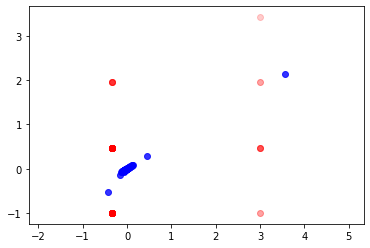

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, color = 'red')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color = 'blue')
plt.axis('equal');

In [0]:
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.464150,1.803979
1,1.124925,-1.458788
2,0.620125,0.656416
3,-0.780146,-0.598790
4,-1.253519,-0.436811


In [0]:
finalDf = pd.concat([principalDf, review[['overall']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,overall
0,-0.464150,1.803979,5.0
1,1.124925,-1.458788,5.0
2,0.620125,0.656416,5.0
3,-0.780146,-0.598790,5.0
4,-1.253519,-0.436811,5.0


In [0]:
#review['overall'].unique()
review.groupby(['overall']).count()['reviewerID']

overall
1.0     59540
2.0     30004
3.0     39570
4.0     93331
5.0    270400
Name: reviewerID, dtype: int64

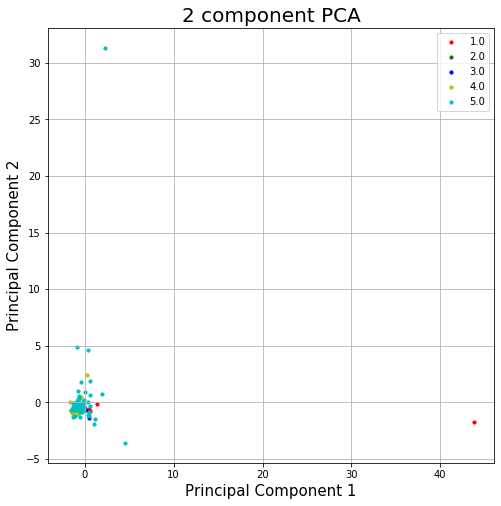

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0,3.0,4.0,5.0]
colors = ['r', 'g', 'b','y','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['overall'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [0]:
#principalDf[0:1]

In [0]:
dst_pca={}
dst_list_pca=[]
for i in range(len(principalDf)):
    temp_row_pca =[]
    for j in range(len(principalDf)):
        #print(i,j)
        temp_pca = distance.euclidean(principalDf[i:i+1],principalDf[j:j+1])
        temp_row_pca.append(temp_pca)
        dst_pca[(reviewerID['reviewerID'][i],reviewerID['reviewerID'][j])] = temp_pca
    dst_list_pca.append(temp_row_pca)
print(list(dst_pca.items())[:5])

[(('AKM1MP6P0OYPR', 'AKM1MP6P0OYPR'), 0.0), (('AKM1MP6P0OYPR', 'A1C9DX5I4N7CSP'), 3.6291606713984), (('AKM1MP6P0OYPR', 'A3W0E107PP7K1D'), 1.5787825911038371), (('AKM1MP6P0OYPR', 'A1ZF9CKPP5DF3H'), 2.4234591370580976), (('AKM1MP6P0OYPR', 'A3HI0M5M6THIBD'), 2.3757611277446835)]


In [0]:
sorted_dst_pca = {key:value for key,value in sorted(dst_pca.items(),key =lambda item:item[1]) if value!=0.0}
sorted_dst_pca

{('A304B8P50JOE3O', 'A1YAHKESH1JVQZ'): 0.007625449623260464,
 ('A1YAHKESH1JVQZ', 'A304B8P50JOE3O'): 0.007625449623260464,
 ('AH847EOFBNPW4', 'A1V7K2SZCVUO0T'): 0.013297635587654521,
 ('A1V7K2SZCVUO0T', 'AH847EOFBNPW4'): 0.013297635587654521,
 ('AJ3CY8Y6R0WQ4', 'AOAUR0911EF14'): 0.02144042888629643,
 ('AOAUR0911EF14', 'AJ3CY8Y6R0WQ4'): 0.02144042888629643,
 ('A1V7K2SZCVUO0T', 'AOEDXOKYPII2Z'): 0.021623615134562214,
 ('AOEDXOKYPII2Z', 'A1V7K2SZCVUO0T'): 0.021623615134562214,
 ('A3408THMCPVP4C', 'A25UQJ2ID3PN9K'): 0.028791428675886067,
 ('A25UQJ2ID3PN9K', 'A3408THMCPVP4C'): 0.028791428675886067,
 ('ADE30ONFEVHRX', 'A2IY84BDOYNPEZ'): 0.02961888091224086,
 ('A2IY84BDOYNPEZ', 'ADE30ONFEVHRX'): 0.02961888091224086,
 ('A2U9F9OHRIWIIA', 'A1ARYWPRA9NJE3'): 0.033402066826332136,
 ('A1ARYWPRA9NJE3', 'A2U9F9OHRIWIIA'): 0.033402066826332136,
 ('A3RZRURJ33T1VO', 'A31MUXDUP5EMCG'): 0.03342144232072286,
 ('A31MUXDUP5EMCG', 'A3RZRURJ33T1VO'): 0.03342144232072286,
 ('AH847EOFBNPW4', 'AOEDXOKYPII2Z'): 0.0

The graph for PCA or the distances from PCA are not exactly same as in Q5, but we can say the trends are similar.

## 7. Is it possible to use logistic regression to predict the rating (5 levels) of a product? Why may it be advantageous to use a logistic regression to predict the 5-star rating over MNL with 5 categories?


In [0]:
review.groupby(['overall']).count()['reviewerID']

overall
1.0     59540
2.0     30004
3.0     39570
4.0     93331
5.0    270400
Name: reviewerID, dtype: int64

It is possible to do a logistic regression to predict the rating of the product using the two principal components. There are five levels but the data is not balanced for all the levels as we see most of the ratings are 5 star rating. We can balance the data by redifining two levels as the total number of observations for Rating 1 to 4  is similar to the number of observations with rating 5 alone.  Hence, it will be advantageous to use logistic over MNL  and we can have a balanced dataset with two levels for the rating ( rating ==5, rating != 5). As in multinomial regression you can interpret the betas only to compare between two calsses, and alos you can not have an order in the output variable (Rating 1<Rating 2<Rating 3<4<5) So in logistic regression we defined cutoffs like 0,0.20,0.40,.0.80,1 which will help us classify the outcome into every rating's bucket.

## 8. Perform a lasso logistic regression and measure the out-of-sample accuracy of your method of choice.

In [0]:
len(bag_of_words)

492845

In [0]:
# Add helpful information to independent variables
X = bag_of_words.copy()
X[['helpful_start','helpful_end']] = review[['helpful_start','helpful_end']]

In [0]:
# Standardize the data
columns = X.columns.values.tolist()
X[columns] = StandardScaler().fit_transform(X[columns])
X.head()

,use,work,s,one,great,would,good,get,like,product,...,trip,fail,notreal,load,wear,loud,notwant,later,helpful_start,helpful_end
0,-0.004505,-0.010099,-0.005906,-0.004273,189.321017,-0.005284,-0.005384,-0.002765,-0.002467,-0.006300,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.048262,-0.069819
1,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,107.054274,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.118213
2,-0.004505,73.185237,-0.005906,-0.004273,94.656763,-0.005284,-0.005384,-0.002765,-0.002467,-0.006300,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.118213
3,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,-0.006300,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.118213
4,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,-0.006300,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.118213


In [0]:
y = review['overall'][0:n].copy()

# Create training and test dataset:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [0]:
# Covert overall score to 1(overall = 5) and 0(overall != 5)
y_train=np.where(y_train == 5, 1, 0)

In [0]:
#X_train.head()

,use,work,s,one,great,would,good,get,like,product,...,trip,fail,notreal,load,wear,loud,notwant,later,helpful_start,helpful_end
356685,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,-0.0063,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.118213
429176,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,-0.0063,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.048262,-0.069819
202973,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,-0.0063,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.118213
91206,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,-0.0063,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.118213
428153,-0.004505,-0.010099,-0.005906,-0.004273,-0.007491,-0.005284,-0.005384,-0.002765,-0.002467,-0.0063,...,0.0,-0.001911,-0.001424,0.0,0.0,0.0,-0.001424,-0.001424,-0.098832,-0.069819


In [0]:
# Fit the cv binary lasso model
log = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=3, dual=False, 
                           penalty='l1', scoring=None, solver='saga', tol=0.0001, 
                           max_iter=200, random_state=123, multi_class='ovr') 
log.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=200, multi_class='ovr', n_jobs=None, penalty='l1',
                     random_state=123, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [0]:
# Predict the test dataset and convert the result to 5 levels
# We assume that if the prob of giveing 5 stars are higher than 0.8, than the predicted rating is 5
# If the prob of giveing 5 stars are less than 0.8 and higher than 0.6, than the predicted rating is 4...
y_predict = log.predict_proba(X_test)
y_pred = []
for i in range(len(y_predict)):
    if y_predict[i][1] >= 0.8:
        y_pred.append(5.0)
    elif y_predict[i][1] >= 0.6:
        y_pred.append(4.0)
    elif y_predict[i][1] >= 0.4:
        y_pred.append(3.0)
    elif y_predict[i][1] >= 0.2:
        y_pred.append(2.0)
    else:
        y_pred.append(1.0)

In [0]:
# Calculate accuracy
y_test = list(y_test)
right = 0
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        right = right + 1
accuracy = right / len(y_test)
accuracy

0.08056285444713855

### 9. Implement a method to aggregate reviews by product. Can you use any of the other columns to help with aggregation? Explain why or why not. Please clearly explain your method.

In [0]:
reviews = bag_of_words.copy()

In [0]:
# Multiply word frequency with helpfulness (weight)
# We assume review with higher helpfulness value has higher weight in influencing product's rating
helpfulness = (review['helpful_start']/review['helpful_end'])[0:n]
helpfulness.fillna(0, inplace = True)
columns = bag_of_words.columns.values.tolist()
for column in columns:
    reviews[column] = reviews[column] * (1 + helpfulness)

In [0]:
reviews['asin'] = review['asin']
reviews.head()

,use,work,s,one,great,would,good,get,like,product,...,clean,trip,fail,notreal,load,wear,loud,notwant,later,asin
0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0132793040
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B0031GGQC6
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B0031GGQC6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B0031GGQC6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B0031GGQC6


In [0]:
product_rev = reviews.groupby('asin').sum()

In [0]:
product_rev.shape

(24899, 500)

In [0]:
product_rev.head()

,use,work,s,one,great,would,good,get,like,product,...,dell,clean,trip,fail,notreal,load,wear,loud,notwant,later
asin,,,,,,,,,,,,,,,,,,,,,
0132793040,0.0,0.00,0.0,0.000,4.0,0.0,0.0,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0031GGQC6,10.0,72.75,19.0,20.875,38.0,19.0,21.0,7.875,3.714286,31.875,...,11.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,1.0
B0031GI958,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0031GI95I,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0031GI95S,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 10. Establish a method for measuring the distance between different products.

In [0]:
# Create a subset including the first 10 products
sub_rev = product_rev[0:10].copy()
sub_rev.shape

(10, 500)

In [0]:
# Standardize the data
columns = sub_rev.columns.values.tolist()
sub_rev[columns] = StandardScaler().fit_transform(sub_rev[columns])
sub_rev

,use,work,s,one,great,would,good,get,like,product,...,dell,clean,trip,fail,notreal,load,wear,loud,notwant,later
asin,,,,,,,,,,,,,,,,,,,,,
0132793040,-0.333333,-0.333333,-0.333333,-0.333333,-0.017653,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333
B0031GGQC6,3.000000,3.000000,3.000000,3.000000,2.983334,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,0.0,0.0,3.000000,3.000000,0.0,0.0,0.0,3.000000,3.000000
B0031GI958,-0.333333,-0.333333,-0.333333,-0.333333,-0.370710,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333
B0031GI95I,-0.333333,-0.333333,-0.333333,-0.333333,-0.370710,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333
B0031GI95S,-0.333333,-0.333333,-0.333333,-0.333333,-0.370710,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333
B0031GJR0E,-0.333333,-0.333333,-0.333333,-0.333333,-0.370710,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333
B0031GJR6S,-0.333333,-0.333333,-0.333333,-0.333333,-0.370710,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333
B0031GK2NK,-0.333333,-0.333333,-0.333333,-0.333333,-0.370710,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333
B0031GK2QW,-0.333333,-0.333333,-0.333333,-0.333333,-0.370710,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,...,-0.333333,0.0,0.0,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,-0.333333


In [0]:
# Using the weighted and standardized word frequency to calculate the euclidean distance between product
distance_df = pd.DataFrame(euclidean_distances(sub_rev, sub_rev))
distance_df.index = sub_rev.index
distance_df.columns = sub_rev.index
distance_df

asin,0132793040,B0031GGQC6,B0031GI958,B0031GI95I,B0031GI95S,B0031GJR0E,B0031GJR6S,B0031GK2NK,B0031GK2QW,B0031GK3MK
asin,,,,,,,,,,
0132793040,9.078709e-07,56.932694,7.193422e+00,7.193422e+00,7.193422e+00,7.193422e+00,7.193422e+00,7.193422e+00,7.193422e+00,7.193422e+00
B0031GGQC6,5.693269e+01,0.000000,5.683826e+01,5.683826e+01,5.683826e+01,5.683826e+01,5.683826e+01,5.683826e+01,5.683826e+01,5.683826e+01
B0031GI958,7.193422e+00,56.838264,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07
B0031GI95I,7.193422e+00,56.838264,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07
B0031GI95S,7.193422e+00,56.838264,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07
B0031GJR0E,7.193422e+00,56.838264,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07
B0031GJR6S,7.193422e+00,56.838264,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
B0031GK2NK,7.193422e+00,56.838264,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
B0031GK2QW,7.193422e+00,56.838264,1.192093e-07,1.192093e-07,1.192093e-07,1.192093e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
